# Tehtävä 0.
## Aihe: Ympäristön pystytys

Luo ohjelmointiympäristö asentamalla syväoppimiseen tarvittavat kirjastot. Seuraa materiaaleista "ympäristön_pystytys.md" ohjeita.

Kun olet asentanut kirjastot, aja alla oleva solu. Jos ei tule virhettä, niin ympäristösi on asennettu oikein.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf

print(tf.__version__) # Pitäisi tulostaa tensorflow 2.0 tai uudempi versio

2.3.0


# Tehtävä 1
### Aihe: Datan esikäsittely ja ohjattu oppiminen
3,3 pistettä

1. Katso diabetes - datasetin tiedot Kagglesta https://www.kaggle.com/uciml/pima-indians-diabetes-database ja lataa "likainen" versio tästä datasetistä osoitteesta https://student.labranet.jamk.fi/~korpjo/files/diabetes.csv

2. Lataa csv-tiedosto Pandas DataFrameen, suorita seuraavat datan siivoamisoperaatiot:
    * Pudota NaN rivit
    * Pudota identtiset rivit
    * Korvaa suuresti poikkeavat arvot jollakin järkevällä arvolla (Vinkki: Visualisoi sarakkeiden arvot)

3. Tämän jälkeen skaalaa data käyttäen standardisointia tai minimi-maksimi skaalausta.

4. Muuta datasetti valvotun oppimisen muotoon, eli erottele data ominaisuuksiin ja ennustettaviin arvoihin. 

5. Jaa datasetti koulutus- ja testidatasettiin.

6. Aja "Tehtävän vastaukset" solu, jossa todistetaan, että DataFrame on siivottu ja valmis koneoppimisen malleille:
    * Ei identtisiä rivejä (Funktion df.duplicated().any().sum() tulos on 0)
    * Ei NaN rivejä (Funktion df.isna().any().sum() tulos on 0)

In [8]:
# Tehtävän toteutus
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('../../data/diabetes.csv')
# poista NaN rivit
df.dropna(inplace=True)

# poista duplikaatit
df.drop_duplicates(keep='first', inplace=True)

# korvaa suuresti poikkeavat arvot
# laske mediaani ja korvaa 0 arvot sillä ja överi poikkeamat (max 2x median).
replaceableValues = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for value in replaceableValues:    
    median = df[value][df[value] != 0].median()
    maxM = 2.0 * median
    df.loc[(df[value] == 0), value]= median
    df.loc[(df[value] > maxM), value]= maxM
    #dfplot = df[value]
    #dfplot.plot.bar(figsize=(10, 4))
    #plt.show()


# sekoita pakka
from sklearn.utils import shuffle
df = shuffle(df)

# muuta data valvotun oppimisen muotoon, eli erottele data ominaisuuksiin ja ennustettaviin arvoihin.
# ominaisuudet sarakkeet 0-6; Sarake 7 ikä jää pois, koska nuoret eivät ole vielä kerenneet saada diabetestä, joten ikä sotkisi ennusteen. Lisäksi osa vanhoista ei kerkeä saamaan diabetestä ennen oletettua kuolemaa.
x = np.array(df.iloc[:, 0:7])
# ennustettava arvo sarake 8
y = np.array(df.iloc[:, 8])

# skaalaa standardoimalla / minimi-maksimi menetelmällä
scaler = StandardScaler()
#scaler = MinMaxScaler()
scaledX = scaler.fit_transform(x.reshape(-1, 7))

# Jaa datasetti koulutus- ja testidatasettiin, käytetään skaalattua x arvoa SEKÄ opetus-, että testidatassa!
limiter = 400
train_x = scaledX[:limiter]
test_x = scaledX[limiter:]

train_y = y[:limiter]
test_y = y[limiter:]

In [9]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. Sijoita muokkaamasi dataframe df - muuttujaan.
print("Amount of NaN rows in dataframe: ",df.isna().any().sum())
print("Amount of duplicate rows in dataframe: ",df.duplicated().any().sum())

Amount of NaN rows in dataframe:  0
Amount of duplicate rows in dataframe:  0


# Tehtävä 2.
### Aihe: Neuroverkko käsin
3,3 pistettä

Alla on määritelty koordinaattipareja, joiden avulla on piirretty kahta eri värisiä pisteitä. Tavoitteena on luoda neuroverkko, joka jakaa kuvaajan siniseen ja punaiseen alueeseen. Kun kuvaajaan piirretään uusi piste ja pisteen koordinaatit syötetään neuroverkolle, neuroverkon ennuste kertoo sen, minkä värinen piste on.

Katso materiaaleista, miten luot neuroverkon käsin käyttäen NumPy - kirjaston taulukoita ja funktioita. 

1. Luo koulutusdatasetti koordinaattipisteet ja värit ominaisuuksiin ja ennustettaviin arvoihin.
2. Luo neuroverkkoluokka, jonka rakenne on:
    * Sisääntulokerros, jossa on kaksi neuronia
    * Yksi piiloitettua kerros, jossa on 6 neuronia ja aktivaatiofunktiona sigmoid.
    * Ulostulokerros, jossa yksi neuroni ja aktivaatiofunktiona sigmoid.
3. Luo funktiot, joiden avulla lasket neuroverkon ennustuksen syöttödatalle (forwardpropagation) ja päivität yhteyksien painoarvoja virheen avulla (backpropagation)
4. Syötä koulutusdatasetti 1000 kertaa neuroverkon läpi.
    * Syötä jokaisella kierroksella koulutusdata rivi riviltä neuroverkon läpi ja päivitä painoarvot.
    * Tallenna kierroksen aikana virheet jokaiselle syötölle, ja lisää kierroksen virheistä keskiarvo listaan. Piirrä kuvaaja siitä, kuinka virhe muuttuu koulutuksen aikana
5. Ennusta neuroverkolla, minkä värinen on piste: [0.1,-5.8]
6. Aja "Tehtävän vastaukset" solu

Vinkkejä:
* Piirrä neuroverkon rakenne piirrustusohjelmalla tai paperille, näät silloin yhteyksien määrän jokaisessa kerroksessa.
* Käytä olemassa olevaa ratkaisua materiaaleista, lisää siihen tarvittavat laskut jokaiselle kerrokselle.

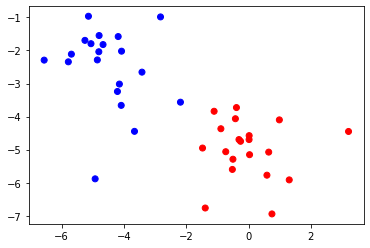

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

dots, labels = make_blobs(n_samples=40,centers=2,n_features=2,random_state=50)
colors = ['red' if label == 0 else 'blue' for label in labels]
plt.scatter(dots[:,0],dots[:,1],color=colors)

Epoch 100 Loss: [0.01982895]
Epoch 200 Loss: [0.00784493]
Epoch 300 Loss: [0.00445298]
Epoch 400 Loss: [0.00300189]
Epoch 500 Loss: [0.00222246]
Epoch 600 Loss: [0.00174425]
Epoch 700 Loss: [0.00142571]
Epoch 800 Loss: [0.00127306]
Epoch 900 Loss: [0.00099501]
Epoch 1000 Loss: [0.00071371]


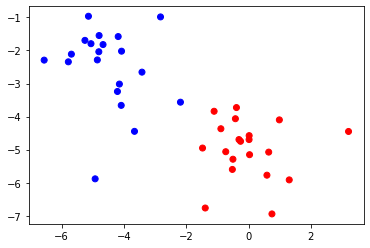

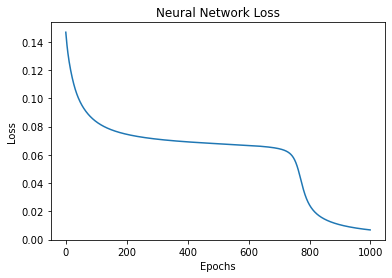

Lopputulos:[0.11963312]


In [5]:
from sklearn.datasets import make_blobs


# Tehtävän toteutus jatkuu tästä
class NeuralNetwork:
    def __init__(self):
        # Alustetaan painoarvot satunaisesti
        self.weights1 = np.random.rand(2,6)
        self.weights2 = np.random.rand(6,1)
        
    # Virhefunktio
    def loss_function(self,true,prediction):
        return 0.5 * (true - prediction)**2
    
    # Virhefunktion derivaatta
    def loss_function_derivative(self,true,prediction):
        return true - prediction
    
    # Sigmoid funktio
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    # Sigmoidin derivaatta
    def sigmoid_derivative(self,x):
        return x * (1 - x)
    
    # Syöte neuroverkon kerrosten läpi
    def forwardpropagation(self,X,y):
        # Määritetään ominaisuudet ja halutut arvot NumPy - taulukoiksi sekä lasketaan kerrosten ulostulot
        self.X = np.array([X])
        self.y = np.array([y])
        self.layer1 = self.sigmoid(np.dot(self.X, self.weights1))
        self.output = self.sigmoid(np.dot(self.layer1, self.weights2))
        self.loss = self.loss_function(self.y, self.output)
    
    # Painoarvojen päivitys backpropagation - menetelmällä
    def backpropagation(self, learning_rate):
        output_error = self.loss_function_derivative(self.y, self.output)
        output_delta = output_error * self.sigmoid_derivative(self.output)
        weights2_adjustment = np.dot(self.layer1.T, output_delta)

        layer1_error = np.dot(output_delta, self.weights2.T)
        layer1_delta = layer1_error * self.sigmoid_derivative(self.layer1)
        weights1_adjustment = np.dot(self.X.T, layer1_delta)
        
        self.weights2 += learning_rate * weights2_adjustment
        self.weights1 += learning_rate * weights1_adjustment


dots, labels = make_blobs(n_samples=40,centers=2,n_features=2,random_state=50)
colors = ['red' if label == 0 else 'blue' for label in labels]
plt.scatter(dots[:,0],dots[:,1],color=colors)

#df = pd.DataFrame({'x': dots[:,0], 'y': dots[:,1], 'labels':labels}) # ei tarvita dataframea
# ominaisuudet
train_x = dots
train_y = labels

# koulutusdatasetti 1000 kertaa neuroverkon läpi
neural_network = NeuralNetwork()
epoch_losses = []
epochs = 1000
for epoch in range(1,epochs+1):
    batch_losses = [] # Lista, johon lisätään yhden kierroksen virhearvot
    for X,y in zip(train_x,train_y):
        neural_network.forwardpropagation(X,y)
        neural_network.backpropagation(learning_rate = 0.01)
        batch_losses.append(neural_network.loss[0])
    epoch_losses.append(np.average(batch_losses)) # Otetaan keskiarvo yhden kierroksen virhearvoista
    if epoch % 100 == 0:
        print(f"Epoch {epoch} Loss: {neural_network.loss[0]}")


# Kuvaaja virheen muutoksesta koulutuksen aikana
fig, ax = plt.subplots()
ax.plot(epoch_losses)
ax.set_title("Neural Network Loss")
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
plt.show()

# testidata
test_x = [0.1, -5.8]

# testidatan ajaminen
layer1_output = neural_network.sigmoid(np.dot(test_x, neural_network.weights1))
test_output = neural_network.sigmoid(np.dot(layer1_output, neural_network.weights2))
print('Lopputulos:' + str(test_output))
rounded_output = np.round(test_output, 0)
output = 'red' if rounded_output == 0 else 'blue'

In [6]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. Sijoita output - muuttujaan neuroverkon ennuste syötölle [0.1,-5.8]
print(output)

red


# Tehtävä 3
### Aihe: Yksinkertainen neuroverkko Keras Sequential API:lla
3,3 pistettä

Koulutetaan yksinkertainen neuroverkko Kerassilla käyttäen tehtävässä 1 puhdistettua diabetes datasettiä. (Jos tehtävän teko ei onnistunut, lataa datasetti Kagglesta)

Tehtävästä on löydyttävä vaiheet:
1. Luo neuroverkko (käytä tf.keras.Sequential() funktiota)
2. Määritä häviöfunktio ja optimisaattori (käytä model.compile() funktiota)
3. Kouluta neuroverkko (käytä model.fit() funktiota)
4. Vertaa neuroverkon ennustuksia testidataan (käytä model.evaluate() funktiota)
5. Aja "Tehtävän vastaukset" solu

In [10]:
# Tehtävän toteutus
tf.keras.backend.set_floatx('float64') # poistaa TensorFlowin huomautukset datatyypeistä

# Muutetaan from_tensor_slices - funktiolla  NumPy - taulukot TensorFlowin Dataset - luokkaan
train_dataset = tf.data.Dataset.from_tensor_slices((train_x,train_y))
test_dataset = tf.data.Dataset.from_tensor_slices((test_x,test_y))

# laitetaan data "köntteihin" eli batcheihin. Mitä isompi batch on, sitä enemmän syöttödataa menee kerralla neuroverkon läpi, jolloin neuroverkon koulutus nopeutuu
train_dataset,test_dataset  = train_dataset.batch(1), test_dataset.batch(1)

# luodaan keras kutsun sisääntulokerroksen, piilotettu kerroksen ja ulostulokerroksen aktivaatiofunktiot.
model = tf.keras.Sequential([
    #tf.keras.layers.Dense(7,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
    #tf.keras.layers.Dense(8,activation='relu'), # lisätään toiseen piiloitettuun kerrokseen relu - aktivaatiofunktio.
    tf.keras.layers.Dense(2,activation='softmax') # ulostulokerros, jossa softmax - aktivaatiofunktio
])

# määritellään optimisaattori, virhefuntio ja koulutuksenaikainen seuranta
model.compile(optimizer='adam', # Adam optimisaattori, joka alustetaan oletusparametreillä
              loss='sparse_categorical_crossentropy', # Virhefunktio
              metrics=['accuracy'] # Seurataan koulutuksen aikana, kuinka neuroverkon tarkkuus muuttuu
             )

# sovitetaan opetusdata
model.fit(train_dataset, 
          epochs=20)

# testataan mallia
results = model.evaluate(test_dataset)
print(results)

Epoch 1/20
400/400 [==============================] - 0s 540us/step - loss: 0.6834 - accuracy: 0.5650
Epoch 2/20
400/400 [==============================] - 0s 541us/step - loss: 0.6566 - accuracy: 0.6600
Epoch 3/20
400/400 [==============================] - 0s 566us/step - loss: 0.6431 - accuracy: 0.6350
Epoch 4/20
400/400 [==============================] - 0s 510us/step - loss: 0.6325 - accuracy: 0.6350
Epoch 5/20
400/400 [==============================] - 0s 441us/step - loss: 0.6224 - accuracy: 0.6350
Epoch 6/20
400/400 [==============================] - 0s 456us/step - loss: 0.6127 - accuracy: 0.6375
Epoch 7/20
400/400 [==============================] - 0s 462us/step - loss: 0.6035 - accuracy: 0.6875
Epoch 8/20
400/400 [==============================] - 0s 469us/step - loss: 0.5950 - accuracy: 0.7125
Epoch 9/20
400/400 [==============================] - 0s 482us/step - loss: 0.5871 - accuracy: 0.7300
Epoch 10/20
400/400 [==============================] - 0s 477us/step - loss: 0.580

In [11]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. Sijoita results - muuttujaan funktion model.evaluate() tulos.
# Muista määrittää model.compile() - funktioon seurattavaksi suureeksi metrics=['accuracy'], jotta näät, kuinka suuri osa neuroverkon ennustuksista on oikein.
print(f"Test Loss:{results[0]} Test Accuracy:{results[1]*100}%")

Test Loss:0.5036476759003922 Test Accuracy:78.0281690140845%
